In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END


In [2]:
class Agentstate(TypedDict):
    num1:int
    num2:int
    final1:int
    final2:int
    num3:int
    num4:int
    opr1:str
    opr2:str

In [3]:
def add_1(state:Agentstate):
    """this is the first addition in graph"""
    state['final1'] = state['num1'] + state['num2']
    return state

def sub_1(state:Agentstate):
    """this is the subtraction 1"""
    state['final1'] = state['num2'] - state['num1']
    return state


def add_2(state:Agentstate):
    """this is the first addition in graph"""
    state['final2'] = state['num3'] + state['num4']
    return state

def sub_2(state:Agentstate):
    """this is the subtraction 1"""
    state['final2'] = state['num4'] - state['num3']
    return state

def decision_1_node(state:Agentstate):
    if state['opr1'] == "+":
        return "addition_1"
    elif state['opr1'] == "-":
        return "subtract_1"
    

def decision_2_node(state:Agentstate):
    if state['opr2'] == "+":
        return "addition_2"
    elif state["opr2"] == "-":
        return "subtract_2"
    


In [12]:
graph = StateGraph(Agentstate)
graph.add_node("add_1",add_1)
graph.add_node("sub_1",sub_1)



graph.add_node("router_1",lambda state:state) #any name you can use apart from state
graph.add_node("add_2",add_2)
graph.add_node("sub_2",sub_2)
graph.add_edge(START,"router_1")
# graph.add_node
graph.add_conditional_edges(
"router_1",
decision_1_node,
{
    "addition_1":"add_1",
    "subtract_1":"sub_1"
}

) 
graph.add_node("router_2",lambda state:state)
graph.add_edge("add_1","router_2")
graph.add_edge("sub_1","router_2")
graph.add_conditional_edges(
    "router_2",
    decision_2_node,
    {
        "addition_2":"add_2",
        "subtract_2":"sub_2"
    }
)

graph.add_edge("add_2",END)
graph.add_edge("sub_2",END)

app = graph.compile()


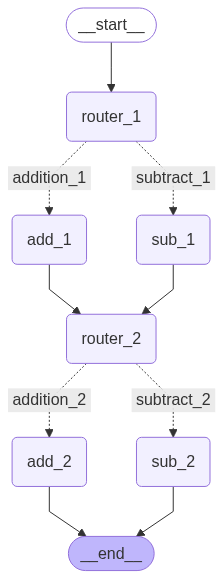

In [14]:
app

In [16]:
initial_state = Agentstate(num1=10,num2=5,num3=10,num4=5,opr1="+",opr2="-")
app.invoke(initial_state)

{'num1': 10,
 'num2': 5,
 'final1': 15,
 'final2': -5,
 'num3': 10,
 'num4': 5,
 'opr1': '+',
 'opr2': '-'}